## 1. Import libary

In [5]:
!pip install opencv-python


In [6]:
!pip install tensorflow
!pip install tensorflow-gpu
import os
import time
import shutil
import random
import cv2
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\shiha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\shiha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\shiha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\shiha\anaconda3\Lib\site-packages\setuptools\_v

In [3]:
!pip install mlxtend
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score

from mlxtend.plotting import plot_confusion_matrix

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 445.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 722.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 845.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 901.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 

## 2. Prepare dataset

### Define labels, and build features (as images) and labels

In [7]:
import pandas as pd
CATEGORIES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
X = []
y = []
data = pd.read_csv(r'H:\Facial Emotion Recognition\Dataset\FER2013\fer2013.csv')  # Remove the extra double quotes
# Check data shape
data.shape


(35887, 3)

In [8]:
data.head(200)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
195,4,150 147 140 138 136 134 132 128 121 114 97 31 ...,Training
196,3,17 12 8 9 15 13 29 25 58 130 168 185 195 194 1...,Training
197,0,42 68 58 71 61 22 26 34 45 76 110 138 136 130 ...,Training
198,6,21 13 4 1 3 12 24 44 57 62 55 59 60 72 106 115...,Training


In [9]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


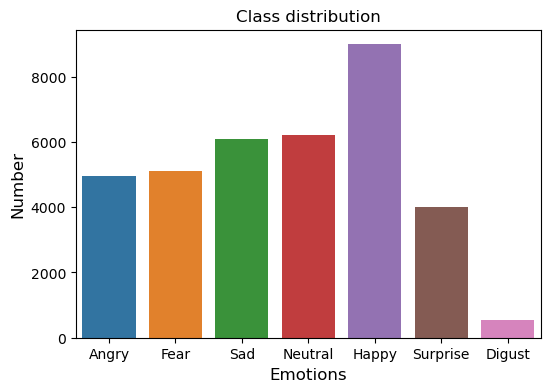

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that emotion_counts is a DataFrame with columns 'emotion' and 'number'

plt.figure(figsize=(6, 4))
sns.barplot(data=emotion_counts, x='emotion', y='number')
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()


In [11]:
for index, row in data.iterrows():
    try:
        pixels=np.asarray(list(row['pixels'].split(' ')), dtype=np.uint8)
        img = pixels.reshape((48,48))
        X.append(img)
        y.append(row['emotion'])
    except Exception as e:
        pass

### Let's have a look at the data

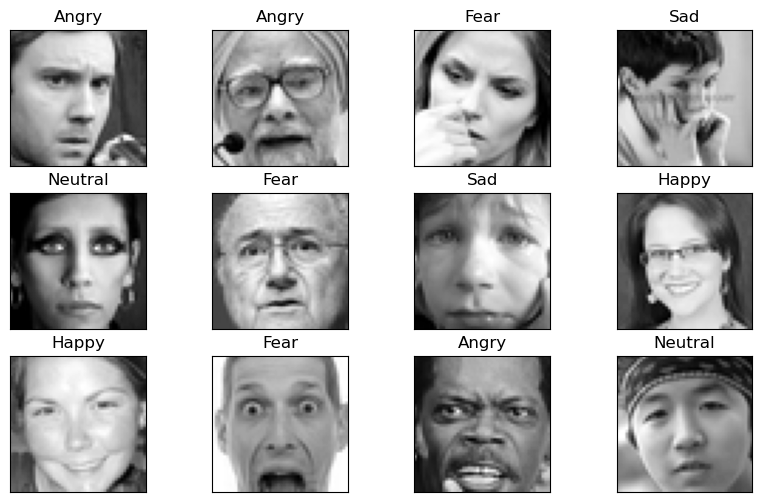

In [12]:
fig = plt.figure(figsize=(10, 6))

for counter, img in enumerate(X[:12]):
    ax = fig.add_subplot(3, 4, counter + 1)
    ax.imshow(X[counter], cmap='gray')
    plt.title(CATEGORIES[y[counter]])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

plt.show()


### Transform features and labels into numpy arrays

In [13]:
X = np.array(X, dtype='float32').reshape(-1, 48, 48)
rgb_X = np.repeat(X[..., np.newaxis], 3, -1)
rgb_X=rgb_X/255.
y = np.asarray(y)
y.shape

(35887,)

In [14]:
rgb_X.shape

(35887, 48, 48, 3)

## 3. Build and train the model

### We first split the data for training and validation

In [35]:
(X_train, X_val, y_train, y_val) = train_test_split(rgb_X, y,
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    shuffle=True,
                                                    stratify=y)

In [16]:
X_train.shape

(28709, 48, 48, 3)

### Creation of generators for: augmentation of training data and for normalization of validation data

In [17]:
aug_train = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

generator_val = ImageDataGenerator()

### The ImageDataGenerator.fit method is used for feature normalization

In [18]:
aug_train.fit(X_train)

generator_val.fit(X_val)

### Transfer Learning ResNet50

In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a Sequential model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # You can adjust the dropout rate as needed
    Dense(7, activation='softmax')  # 7 is the number of classes for your emotion classification
])

# Print the model summary
model.summary()



94765736/94765736 [==============================] - 37s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 23602055 (90.03 MB)
Trainable params: 23548935 (89.83 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


### Create checkpoint, early_stopping, learning_rate_reduction

In [20]:
from tensorflow.keras.optimizers import Adam  # Import the optimizer you want to use

In [21]:
# Compile the model with optimizer and loss function
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
loss = 'sparse_categorical_crossentropy'  # Use the appropriate loss function

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the callbacks
model_checkpoint = ModelCheckpoint('emotion_model.h5',
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True,
                                    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            factor=0.5,
                                            min_lr=0.00001,
                                            verbose=1)


### Use the model to fit the data

In [24]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint, early_stopping, learning_rate_reduction])

Epoch 1/25
898/898 [==============================] - ETA: 0s - loss: 1.8409 - accuracy: 0.3639
Epoch 1: val_loss improved from inf to 1.62330, saving model to emotion_model.h5


C:\Users\shiha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 1648s 2s/step - loss: 1.8409 - accuracy: 0.3639 - val_loss: 1.6233 - val_accuracy: 0.3658 - lr: 0.0010
Epoch 2/25
898/898 [==============================] - ETA: 0s - loss: 1.4396 - accuracy: 0.4573
Epoch 2: val_loss did not improve from 1.62330
898/898 [==============================] - 1579s 2s/step - loss: 1.4396 - accuracy: 0.4573 - val_loss: 1.7247 - val_accuracy: 0.4135 - lr: 0.0010
Epoch 3/25
898/898 [==============================] - ETA: 0s - loss: 1.3564 - accuracy: 0.4909
Epoch 3: val_loss improved from 1.62330 to 1.42649, saving model to emotion_model.h5
898/898 [==============================] - 1648s 2s/step - loss: 1.3564 - accuracy: 0.4909 - val_loss: 1.4265 - val_accuracy: 0.4617 - lr: 0.0010
Epoch 4/25
898/898 [==============================] - ETA: 0s - loss: 1.3016 - accuracy: 0.5174
Epoch 4: val_loss did not improve from 1.42649
898/898 [==============================] - 1845s 2s/step - loss: 1.3016 - accuracy: 0.5174 - va

## 4. Model Evaluation

### Loss plots

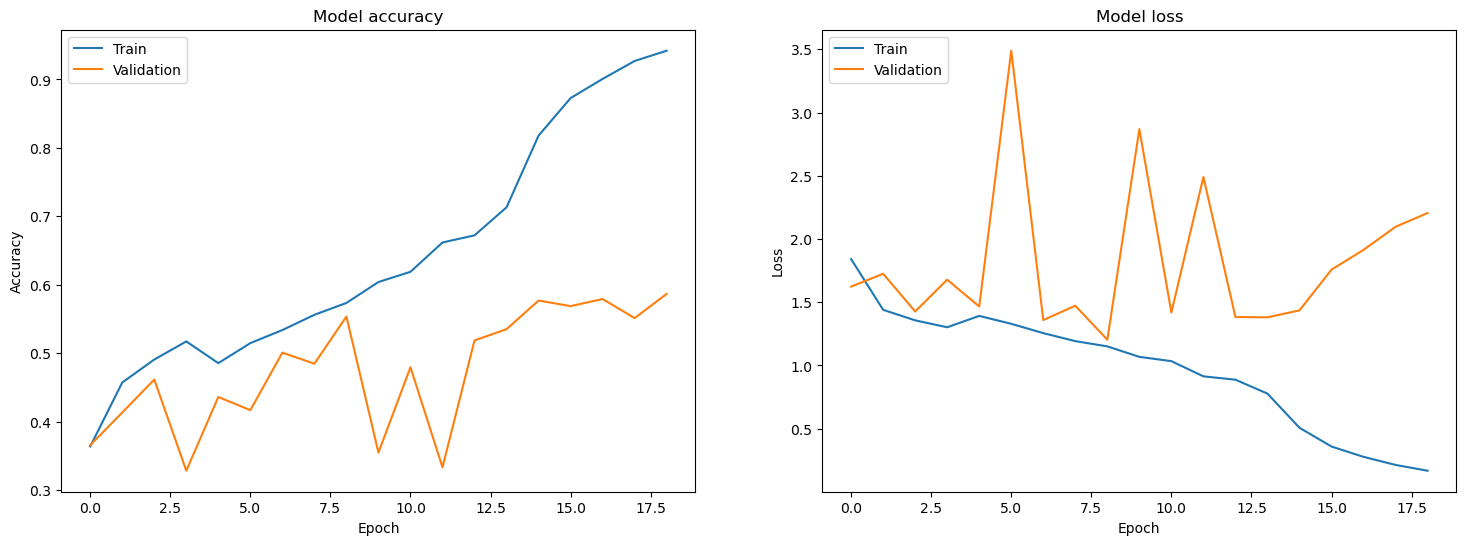

In [25]:
# Plotting code
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()


### Plot confusion matrix

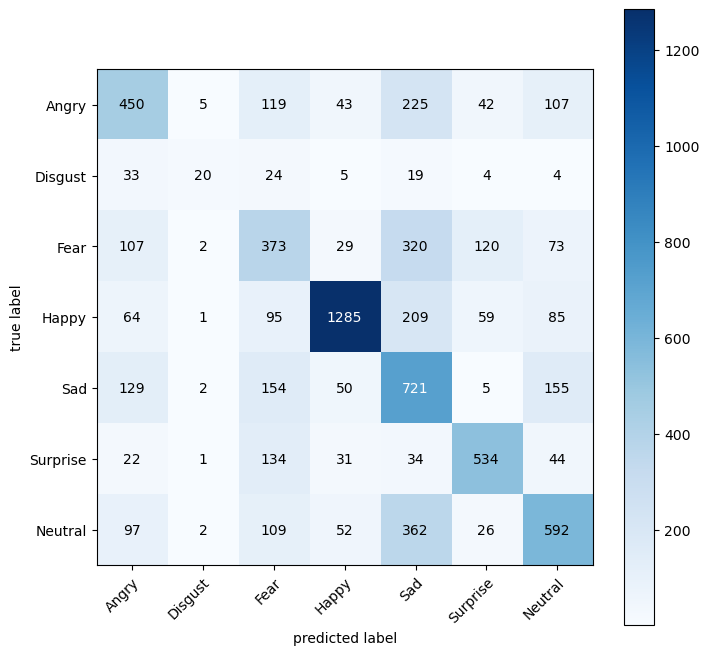

In [29]:
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_val, predicted_label)
plot_confusion_matrix(cm, figsize=(8, 8), cmap=plt.cm.Blues, colorbar=True, class_names=CATEGORIES)
plt.show()


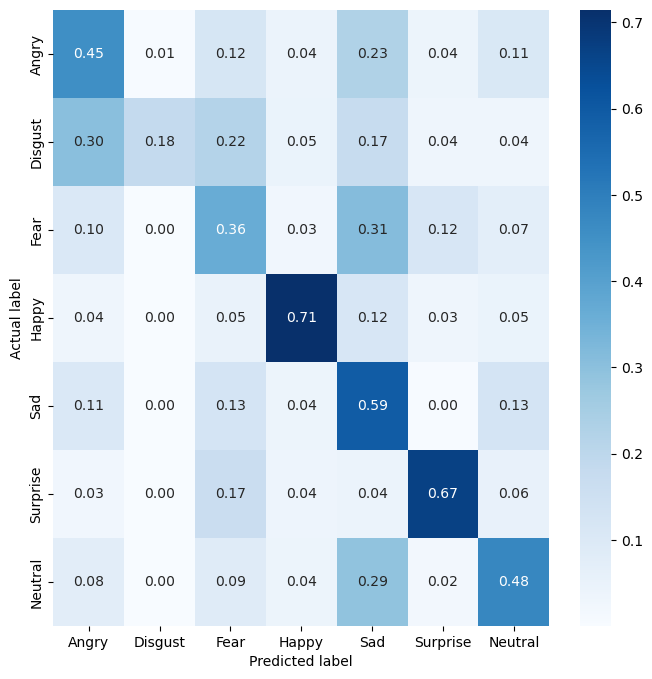

In [30]:
cm = confusion_matrix(y_val, predicted_label)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap(cmn, annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [38]:
from sklearn import metrics  # Import the metrics module

# Assuming you have already defined y_test and y_pred

roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
average_precision_score = metrics.average_precision_score(y_test, y_pred)

print("ROC-AUC Score:", roc_auc_score)
print("AP Score:", average_precision_score)


NameError: name 'y_pred' is not defined

In [39]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import classification_report


In [40]:
predicted_probs = model.predict(X_val)
predicted_labels = np.argmax(predicted_probs, axis=1)


225/225 [==============================] - 64s 278ms/step


In [41]:
# Assuming you have one-hot encoded labels, if not, you can skip this step
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_val_one_hot = lb.fit_transform(y_val)

roc_auc = roc_auc_score(y_val_one_hot, predicted_probs)
ap_score = average_precision_score(y_val_one_hot, predicted_probs)

print("ROC-AUC Score:", roc_auc)
print("AP Score:", ap_score)


ROC-AUC Score: 0.8583124586803498
AP Score: 0.5378518044690611


In [42]:
classification_rep = classification_report(y_val, predicted_labels, target_names=CATEGORIES)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

       Angry       0.50      0.45      0.48       991
     Disgust       0.61      0.18      0.28       109
        Fear       0.37      0.36      0.37      1024
       Happy       0.86      0.71      0.78      1798
         Sad       0.38      0.59      0.46      1216
    Surprise       0.68      0.67      0.67       800
     Neutral       0.56      0.48      0.51      1240

    accuracy                           0.55      7178
   macro avg       0.56      0.49      0.51      7178
weighted avg       0.58      0.55      0.56      7178



In [43]:
from tensorflow.keras.regularizers import l2

# Adjust hyperparameters
learning_rate = 0.0001
batch_size = 64

# Add L2 regularization
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))  # Apply L2 regularization
])

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Fine-tune the model
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint, early_stopping, learning_rate_reduction])


Epoch 1/25
449/449 [==============================] - ETA: 0s - loss: 1.2231 - accuracy: 0.5919
Epoch 1: val_loss improved from 1.20326 to 1.17825, saving model to emotion_model.h5


C:\Users\shiha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/449 [==============================] - 2751s 6s/step - loss: 1.2231 - accuracy: 0.5919 - val_loss: 1.1783 - val_accuracy: 0.5829 - lr: 1.0000e-04
Epoch 2/25
449/449 [==============================] - ETA: 0s - loss: 0.9281 - accuracy: 0.6806
Epoch 2: val_loss improved from 1.17825 to 1.16179, saving model to emotion_model.h5
449/449 [==============================] - 2593s 6s/step - loss: 0.9281 - accuracy: 0.6806 - val_loss: 1.1618 - val_accuracy: 0.5965 - lr: 1.0000e-04
Epoch 3/25
449/449 [==============================] - ETA: 0s - loss: 0.8372 - accuracy: 0.7096
Epoch 3: val_loss did not improve from 1.16179
449/449 [==============================] - 2555s 6s/step - loss: 0.8372 - accuracy: 0.7096 - val_loss: 1.1903 - val_accuracy: 0.5940 - lr: 1.0000e-04
Epoch 4/25
449/449 [==============================] - ETA: 0s - loss: 0.7624 - accuracy: 0.7357
Epoch 4: val_loss did not improve from 1.16179
449/449 [==============================] - 2546s 6s/step - loss: 0.7624 - accuracy:

In [44]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


225/225 [==============================] - 78s 346ms/step - loss: 1.1618 - accuracy: 0.5965
Validation Loss: 1.1617869138717651
Validation Accuracy: 0.5965449810028076


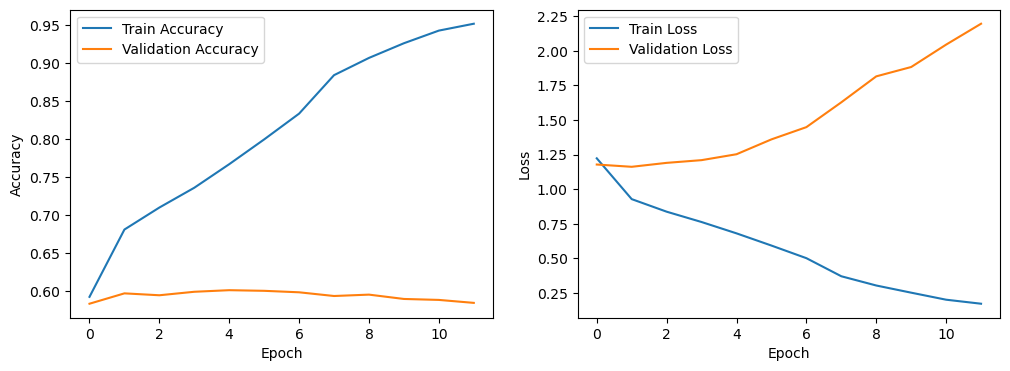

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


225/225 [==============================] - 42s 178ms/step


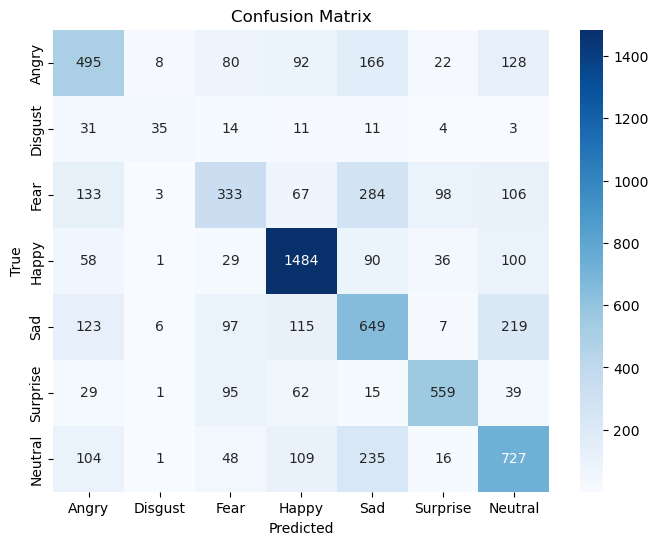

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions on the validation set
predicted_labels = model.predict(X_val)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.metrics import classification_report

# Generate predictions on the validation set
predicted_probs = model.predict(X_val)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate a classification report
classification_rep = classification_report(y_val, predicted_labels, target_names=CATEGORIES)

# Print the classification report
print("Classification Report:\n", classification_rep)


225/225 [==============================] - 38s 167ms/step
Classification Report:
               precision    recall  f1-score   support

       Angry       0.51      0.50      0.50       991
     Disgust       0.64      0.32      0.43       109
        Fear       0.48      0.33      0.39      1024
       Happy       0.76      0.83      0.79      1798
         Sad       0.45      0.53      0.49      1216
    Surprise       0.75      0.70      0.73       800
     Neutral       0.55      0.59      0.57      1240

    accuracy                           0.60      7178
   macro avg       0.59      0.54      0.56      7178
weighted avg       0.59      0.60      0.59      7178

